In [57]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt

In [58]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))

In [59]:
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
# Filter out all apps except for narrow_transformations app
df = df.loc[df['App Name'].str.contains('app_narrow_transf_')]
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [60]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})

In [61]:
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int(x.split('_')[-2]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

In [62]:
execution_times.head(5)

,App ID,App Name,Total app execution time (s),Size percentage,Transformation
0,app-20230707214314-4324,union_app_narrow_transf_gsod_sample_053_1.txt,8.718,53,union
1,app-20230707213552-4268,map_app_narrow_transf_gsod_sample_035_1.txt,5.617,35,map
2,app-20230707213124-4235,map_app_narrow_transf_gsod_sample_024_1.txt,5.508,24,map
3,app-20230707213440-4259,map_app_narrow_transf_gsod_sample_032_1.txt,5.738,32,map
4,app-20230707214115-4309,union_app_narrow_transf_gsod_sample_048_1.txt,8.610,48,union


### 1. Transformation = map / filter

In [63]:
map_execution_times = execution_times.loc[execution_times['Transformation'] == 'map']
filter_execution_times = execution_times.loc[execution_times['Transformation'] == 'filter']
union_execution_times = execution_times.loc[execution_times['Transformation'] == 'union']

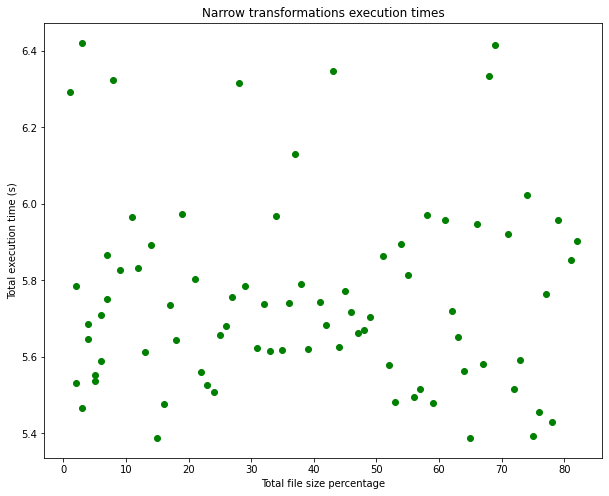

In [64]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = map_execution_times['Size percentage']
# corresponding y axis values
y = map_execution_times['Total app execution time (s)']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('Narrow transformations execution times')

# function to show the plot
plt.show()


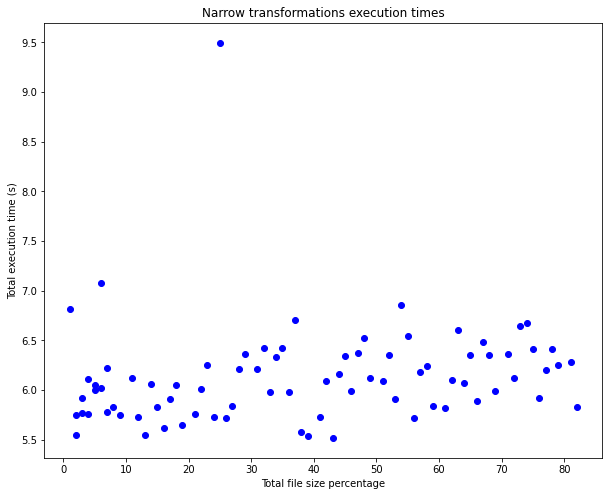

In [65]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = filter_execution_times['Size percentage']
# corresponding y axis values
y = filter_execution_times['Total app execution time (s)']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'blue')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('Narrow transformations execution times')

# function to show the plot
plt.show()


----

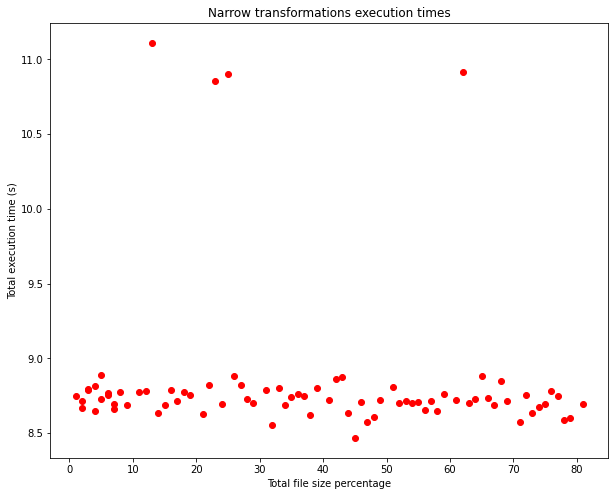

In [66]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = union_execution_times['Size percentage']
# corresponding y axis values
y = union_execution_times['Total app execution time (s)']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'red')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('Narrow transformations execution times')

# function to show the plot
plt.show()


In [26]:
df_test = df.drop(columns = [column for column in df.columns if column.startswith('SHUFFLER') or column.startswith('SHUFFLEW')])
df_test = df_test.loc[df_test['Partition ID'] != '-']
df_test['Partition ID'] = df_test['Partition ID'].astype(int).apply(lambda x: x+1)
df_test_filter = df_test.loc[df_test['App Name'].apply(lambda x: x.split('_')[0]) == 'filter']
df_test_filter = df_test_filter.groupby('App ID').agg({'Partition ID': lambda x: max(x)}).reset_index(drop = False).\
            rename(columns = {'Partition ID': 'Partitions'})

In [27]:
partitions = pd.merge(filter_execution_times, df_test_filter)
partitions

,App ID,App Name,Total app execution time (s),Size percentage,Transformation,Partitions
0,app-20230707212334-4176,filter_app_narrow_transf_gsod_sample_002_1.txt,5.544,2,filter,1
1,app-20230707212358-4179,filter_app_narrow_transf_gsod_sample_003_1.txt,5.919,3,filter,1
2,app-20230707212931-4221,filter_app_narrow_transf_gsod_sample_018_1.txt,6.047,18,filter,1
3,app-20230707213535-4266,filter_app_narrow_transf_gsod_sample_034_1.txt,6.337,34,filter,1
4,app-20230707213559-4269,filter_app_narrow_transf_gsod_sample_035_1.txt,6.423,35,filter,1
5,app-20230707213154-4239,filter_app_narrow_transf_gsod_sample_025_1.txt,9.497,25,filter,1
6,app-20230707213041-4230,filter_app_narrow_transf_gsod_sample_022_1.txt,6.013,22,filter,1
7,app-20230707213131-4236,filter_app_narrow_transf_gsod_sample_024_1.txt,5.733,24,filter,1
8,app-20230707212644-4200,filter_app_narrow_transf_gsod_sample_011_1.txt,6.119,11,filter,1
9,app-20230707212620-4197,filter_app_narrow_transf_gsod_sample_009_1.txt,5.750,9,filter,1


In [ ]:
df_test_map = df_test.loc[df_test['App Name'].apply(lambda x: x.split('_')[0]) == 'map']
df_test_map = df_test_map.groupby('App ID').agg({'Partition ID': lambda x: max(x)}).reset_index(drop = False).\
            rename(columns = {'Partition ID': 'Partitions'})

In [ ]:
pd.merge(map_execution_times, df_test_map)